# Team 9 - Project 1 - Spotify Data Analysis

---

### Dataset Information:
<b>"Spotify_1Million_Tracks"</b> Dataset | Source: <a href="https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks">Kaggle</a>

- This dataset was extracted from the Spotify platform using the Python library <a href="https://spotipy.readthedocs.io/en/2.24.0/">"Spotipy"</a>, which allows users to access music data provided via APIs.
- The dataset collected includes about 1 Million tracks with 19 features between 2000 and 2023. 
    - Also, there is a total of 61,445 unique artists and 82 genres in the data.

Note: This clean data has been prepared and utilized for research purposes. Its significance lies in its potential to unravel patterns and predict song popularity prior to its release.
<br>This dataset could also be used to create various predictive models with machine-learning/deep-learning techniques.

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# File to load
spotify_data_load = Path('spotify_dataset.csv')

# Read Spotify data file and store into DataFrame
spotify_data_df = pd.read_csv(spotify_data_load, index_col=0)
spotify_data_df.head(10)

# Display the columns and data types
#spotify_data_df.info()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4
5,Chris Smither,What They Say,24NvptbNKGs6sPy1Vh1O0v,48,2012,acoustic,0.566,0.570,2,-6.420,1,0.0329,0.6880,0.000002,0.0943,0.960,83.403,166240,4
6,Matt Wertz,Walking in a Winter Wonderland,0BP7hSvLAG3URGrEvNNbGM,48,2012,acoustic,0.575,0.606,9,-8.197,1,0.0300,0.0119,0.000000,0.0675,0.364,121.083,152307,4
7,Green River Ordinance,Dancing Shoes,3Y6BuzQCg9p4yH347Nn8OW,45,2012,acoustic,0.586,0.423,7,-7.459,1,0.0261,0.2520,0.000006,0.0976,0.318,138.133,232373,4
8,Jason Mraz,Living in the Moment,3ce7k1L4EkZppZPz1EJWTS,44,2012,acoustic,0.650,0.628,7,-7.160,1,0.0232,0.0483,0.000000,0.1190,0.700,84.141,235080,4
9,Boyce Avenue,Heaven,2EKxmYmUdAVXlaHCnnW13o,58,2012,acoustic,0.619,0.280,8,-10.238,0,0.0317,0.7300,0.000000,0.1030,0.292,129.948,250063,4


- Genres with Most Danceability for 2023
  
---

In [2]:
# Filter the data for the year 2023
spotify_2023 = spotify_data_df[spotify_data_df['year'] == 2023]

# Group by genre and calculate the average danceability
genre_danceability = spotify_2023.groupby('genre')['danceability'].mean().reset_index()

# Sort top 10 genres by danceability in descending order
top_10_genres_danceability = genre_danceability.sort_values('danceability', ascending=False).head(10)

# Display the top 10 genres with the highest danceability
top_10_genres_danceability

,genre,danceability
8,chicago-house,0.769808
42,hip-hop,0.727788
19,disco,0.721663
17,deep-house,0.718524
51,minimal-techno,0.717804
30,funk,0.716496
15,dancehall,0.698111
18,detroit-techno,0.692977
6,breakbeat,0.686687
36,groove,0.682800


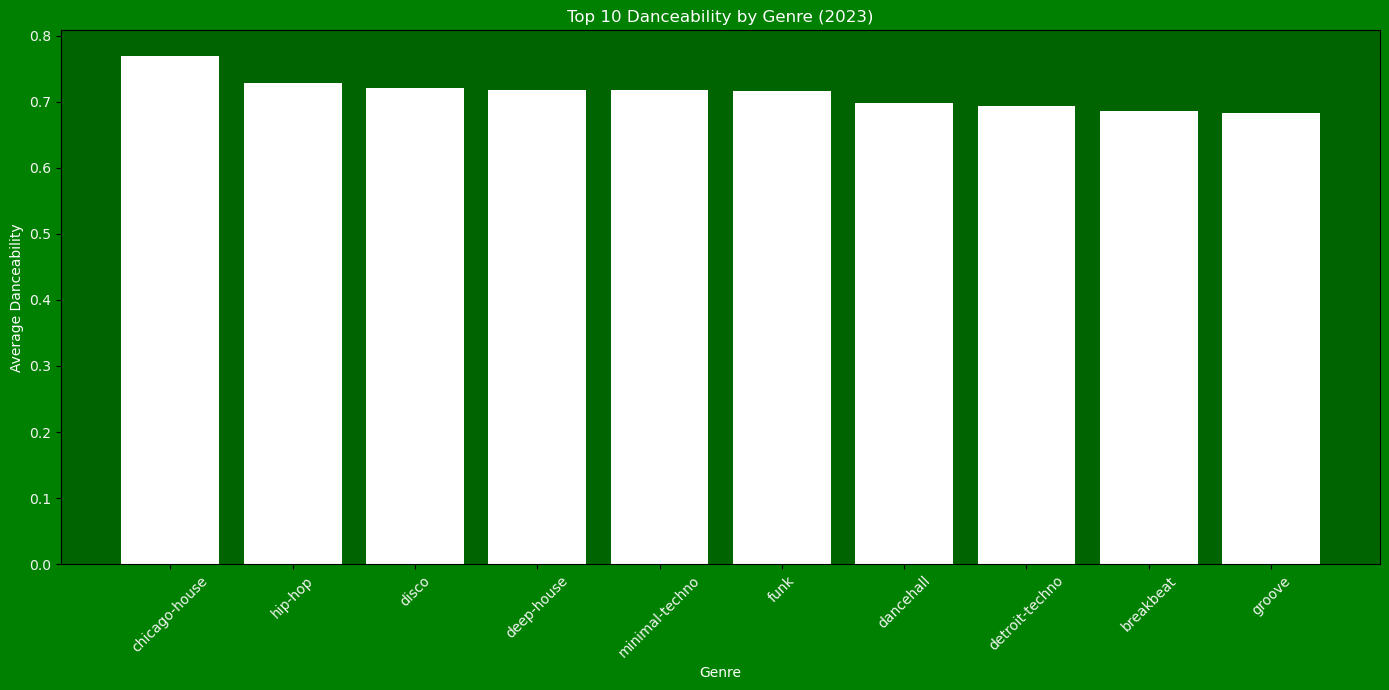

In [3]:
# Create a bar plot
plt.figure(figsize=(14, 7))
plt.bar(top_10_genres_danceability['genre'], top_10_genres_danceability['danceability'], color='white')

# Add chart title and labels and other visual properties
plt.title('Top 10 Danceability by Genre (2023)', color='white')
plt.xlabel('Genre', color='white')
plt.ylabel('Average Danceability', color='white')
plt.xticks(rotation=45, color='whitesmoke')
plt.yticks(color='whitesmoke')
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('green')
plt.tight_layout()

# Show the plot
plt.show()

- Top 10 Songs with Most Danceability for 2023
  
---

In [4]:
# Sort by danceability in descending order
top_danceable_songs = spotify_2023.sort_values(by='danceability', ascending=False)

# Select the top 10 danceability songs with artist and genre
top_10_danceable_songs = top_danceable_songs[['artist_name', 'track_name', 'genre', 'danceability']].head(10)

# Display the top 10 results
top_10_danceable_songs

,artist_name,track_name,genre,danceability
616557,Mishelle Master Boys,Pal Party,salsa,0.982
590582,Group X - Arabian Rap Sensations,It Is Saim,comedy,0.978
599148,MC Menor MT,Sarra na Ponta da Glock X Camuflada,funk,0.978
599055,Mc Rd,Cavucando,funk,0.976
591260,Timbaland,Give It To Me,dance,0.975
598945,Mc Delux,Pra Fumar um Rosh,funk,0.974
598957,Mc Delux,Festa no Guarujá,funk,0.972
591974,U-Brown,Soldier of Jah Army,dancehall,0.968
598569,Lewis OfMan,Attitude - Clubz Remix,french,0.968
592877,Armand Van Helden,Ride It,deep-house,0.966


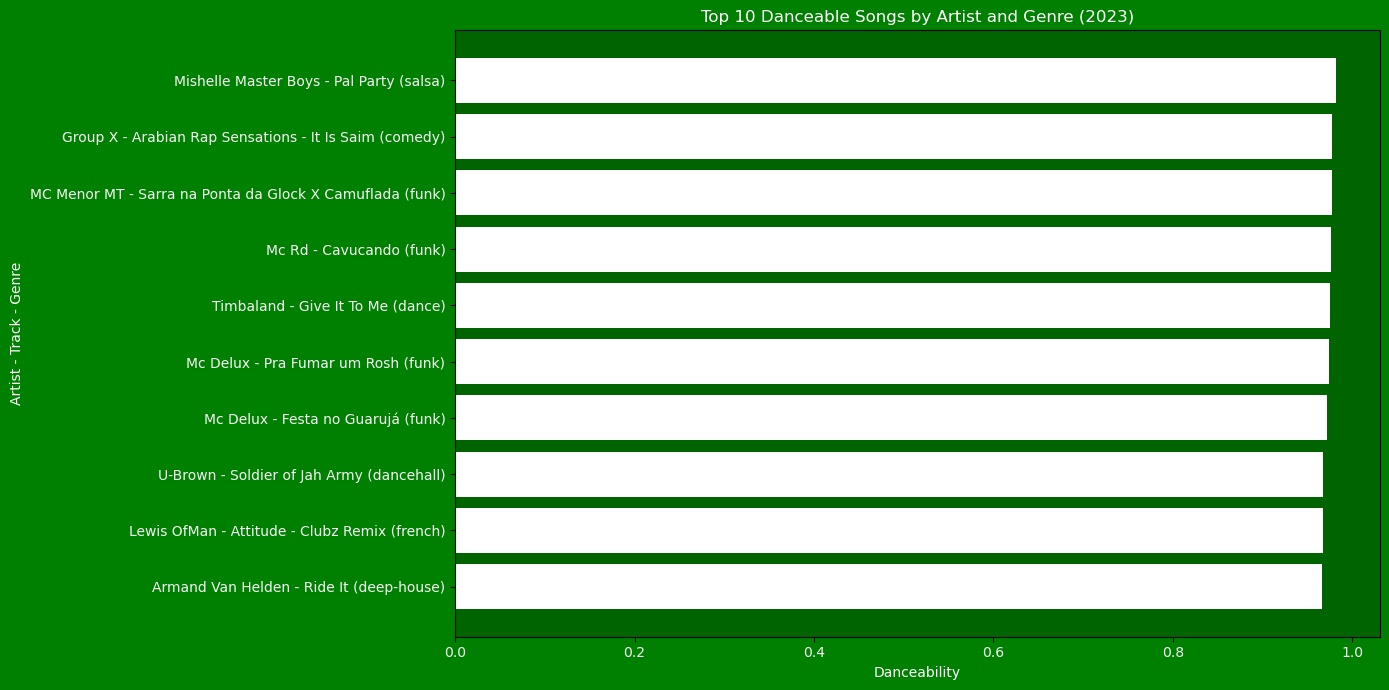

In [5]:
# Create a column combining artist and track name for better labeling
top_10_danceable_songs['artist_track'] = top_10_danceable_songs['artist_name'] + ' - ' + top_10_danceable_songs['track_name'] + ' ('+ top_10_danceable_songs['genre'] + ')'

# Create a horizontal bar plot
plt.figure(figsize=(14, 7))
plt.barh(top_10_danceable_songs['artist_track'], top_10_danceable_songs['danceability'], color='white')

# Add chart title and labels and other visual properties
plt.xlabel('Danceability', color='white')
plt.ylabel('Artist - Track - Genre', color='white')
plt.title('Top 10 Danceable Songs by Artist and Genre (2023)', color='white')
plt.xticks(color='whitesmoke')
plt.yticks(color='whitesmoke')
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('green')
plt.gca().invert_yaxis()
plt.tight_layout()

# Show the plot
plt.show()

- Artist Popularity in Pop Genre for 2023
  
---

In [6]:
# Filter the data for the Pop genre
pop_2023 = spotify_2023[spotify_2023['genre'].str.lower() == 'pop']

# Group by artist and calculate the average popularity
artist_popularity = pop_2023.groupby('artist_name')['popularity'].mean().reset_index()

# Sort by popularity in descending order for top 20
artist_popularity = artist_popularity.sort_values(by='popularity', ascending=False).head(20)

# Display the top 20 artists by popularity
artist_popularity

,artist_name,popularity
32,TINI,84.000000
20,Miley Cyrus,80.272727
26,SZA,80.000000
25,Rauw Alejandro,79.000000
16,Lana Del Rey,77.000000
7,Daniel Caesar,74.000000
17,Latto,74.000000
22,Omar Apollo,73.000000
37,d4vd,72.500000
30,Stephen Sanchez,72.000000


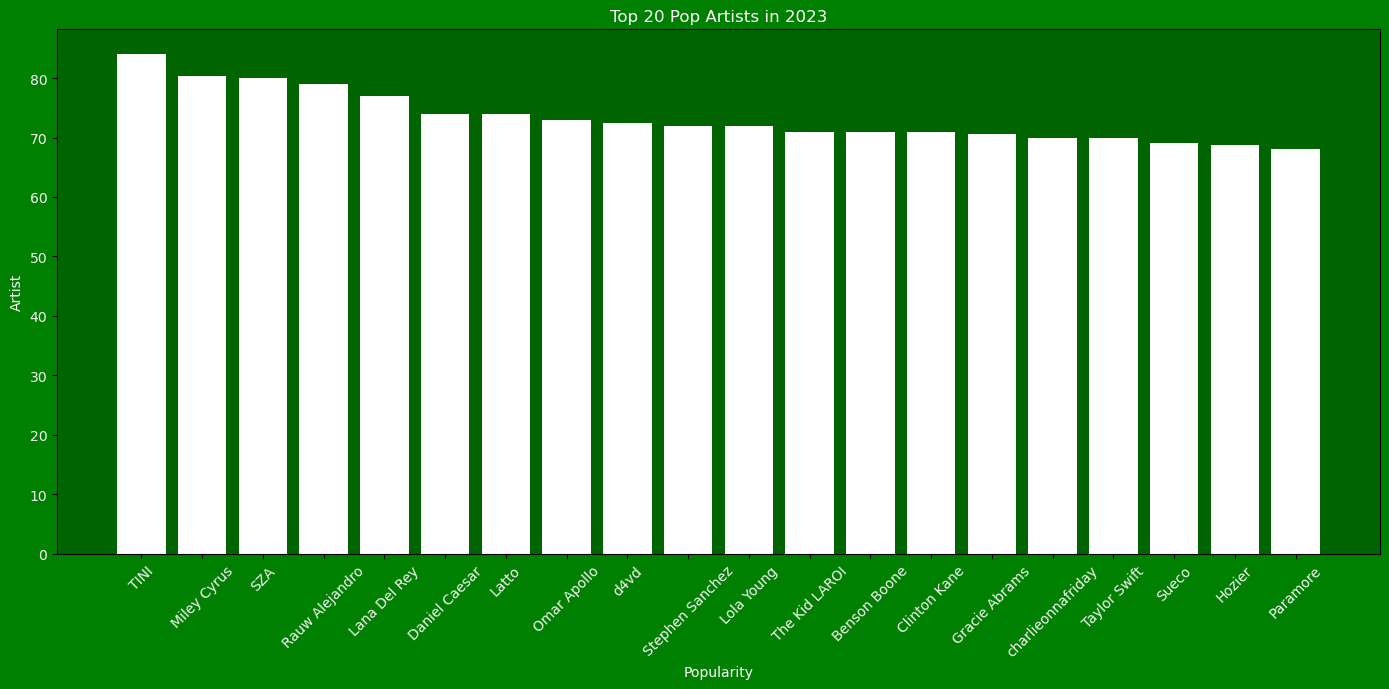

In [7]:
# Create a bar plot
plt.figure(figsize=(14, 7))
plt.bar(artist_popularity['artist_name'], artist_popularity['popularity'], color='white')

# Add chart title and labels and other visual properties
plt.title('Top 20 Pop Artists in 2023', color='white')
plt.xlabel('Popularity', color='white')
plt.ylabel('Artist', color='white')
plt.xticks(rotation=45, color='whitesmoke')
plt.yticks(color='whitesmoke')
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('green')
plt.tight_layout()

# Show the plot
plt.show()

- Danceability Changes from 2000 to 2023
  
---

In [8]:
# Filter the data for the years 2000 to 2023
spotify_2000_2023 = spotify_data_df[spotify_data_df['year'].between(2000, 2023)]

# Group by year and calculate the average danceability
danceability_by_year = spotify_2000_2023.groupby('year')['danceability'].mean().reset_index()

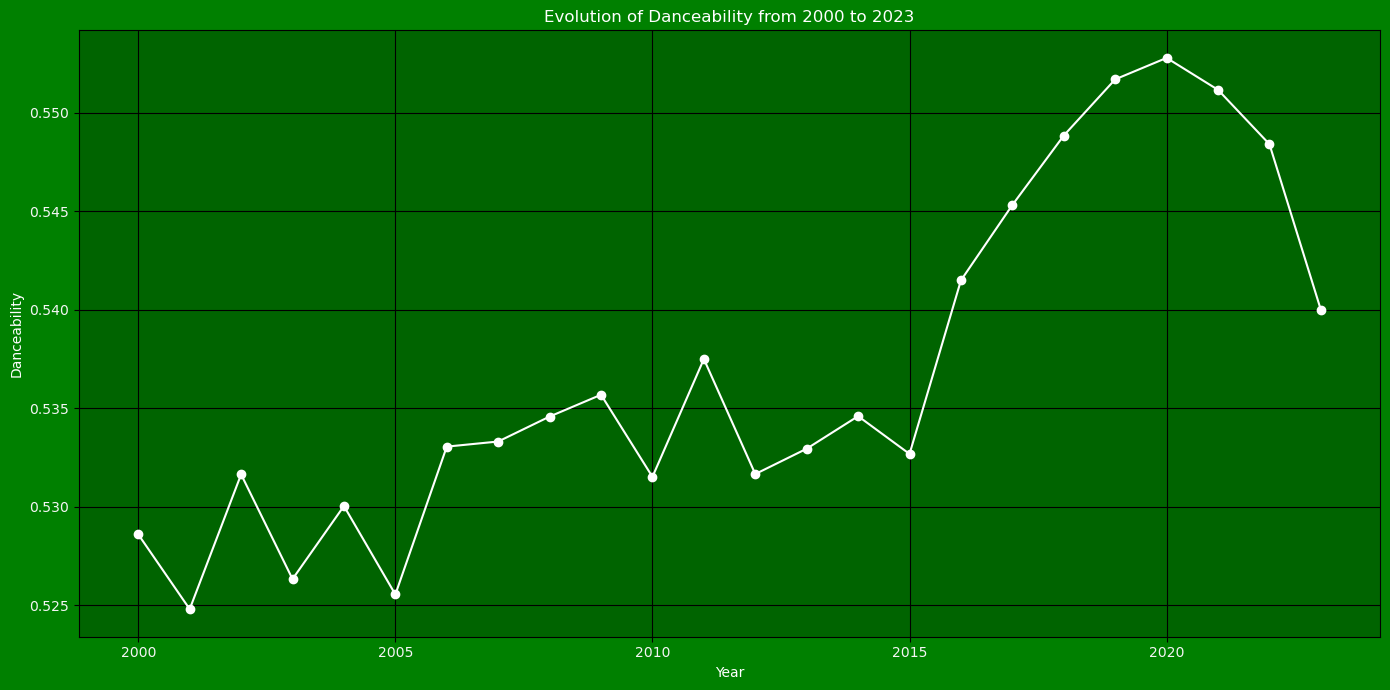

In [9]:
# Create a line plot
plt.figure(figsize=(14, 7))
plt.plot(danceability_by_year['year'], danceability_by_year['danceability'], marker='o', linestyle='-', color='white')

# Add chart title and labels and other visual properties
plt.title('Evolution of Danceability from 2000 to 2023', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Danceability', color='white')
plt.xticks(color='whitesmoke')
plt.yticks(color='whitesmoke')
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('green')
plt.grid(True, color='black')
plt.tight_layout()

# Show the plot
plt.show()

- Acousticness Changes from 2000 to 2023
  
---

In [10]:
# Group by year and calculate the average acousticness
acousticness_by_year = spotify_2000_2023.groupby('year')['acousticness'].mean().reset_index()

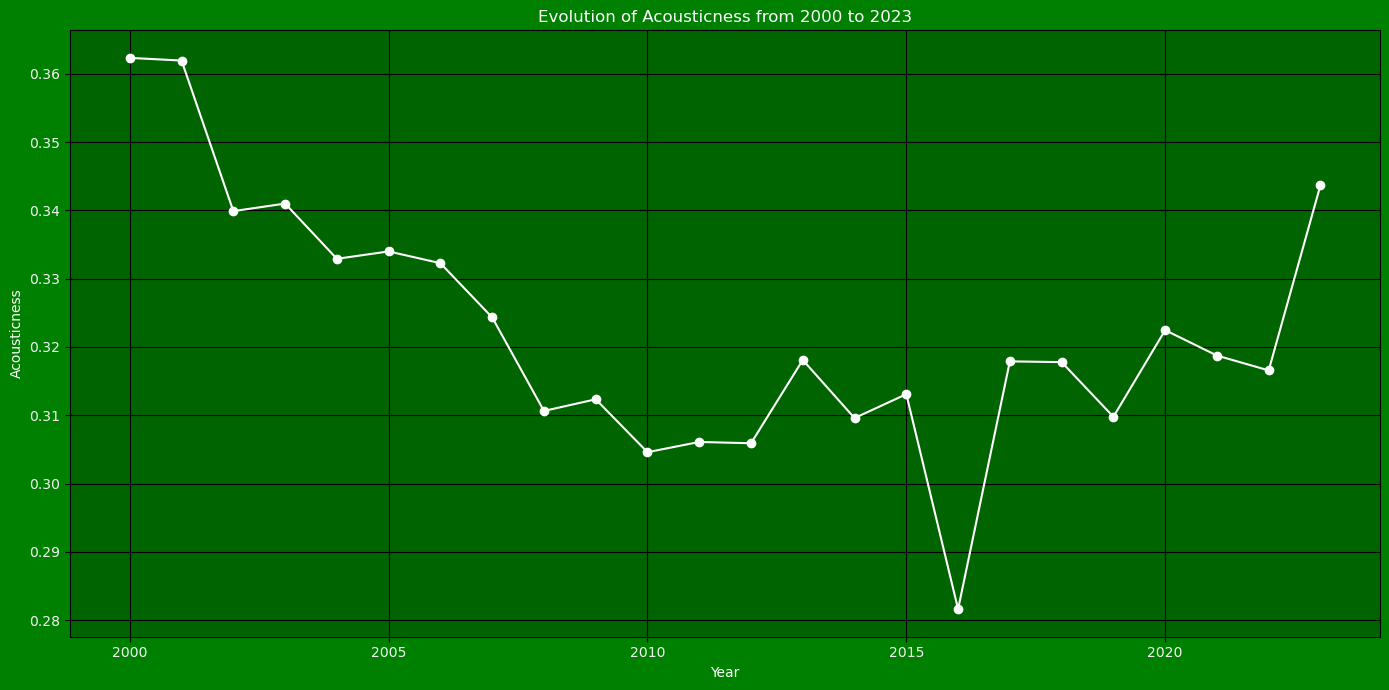

In [11]:
# Create a line plot
plt.figure(figsize=(14, 7))
plt.plot(acousticness_by_year['year'], acousticness_by_year['acousticness'], marker='o', linestyle='-', color='white')

# Add chart title and labels and other visual properties
plt.title('Evolution of Acousticness from 2000 to 2023', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Acousticness', color='white')
plt.xticks(color='whitesmoke')
plt.yticks(color='whitesmoke')
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('green')
plt.grid(True, color='black')
plt.tight_layout()

# Show the plot
plt.show()

- Energy Changes from 2000 to 2023
  
---

In [12]:
# Group by year and calculate the average acousticness
energy_by_year = spotify_2000_2023.groupby('year')['energy'].mean().reset_index()

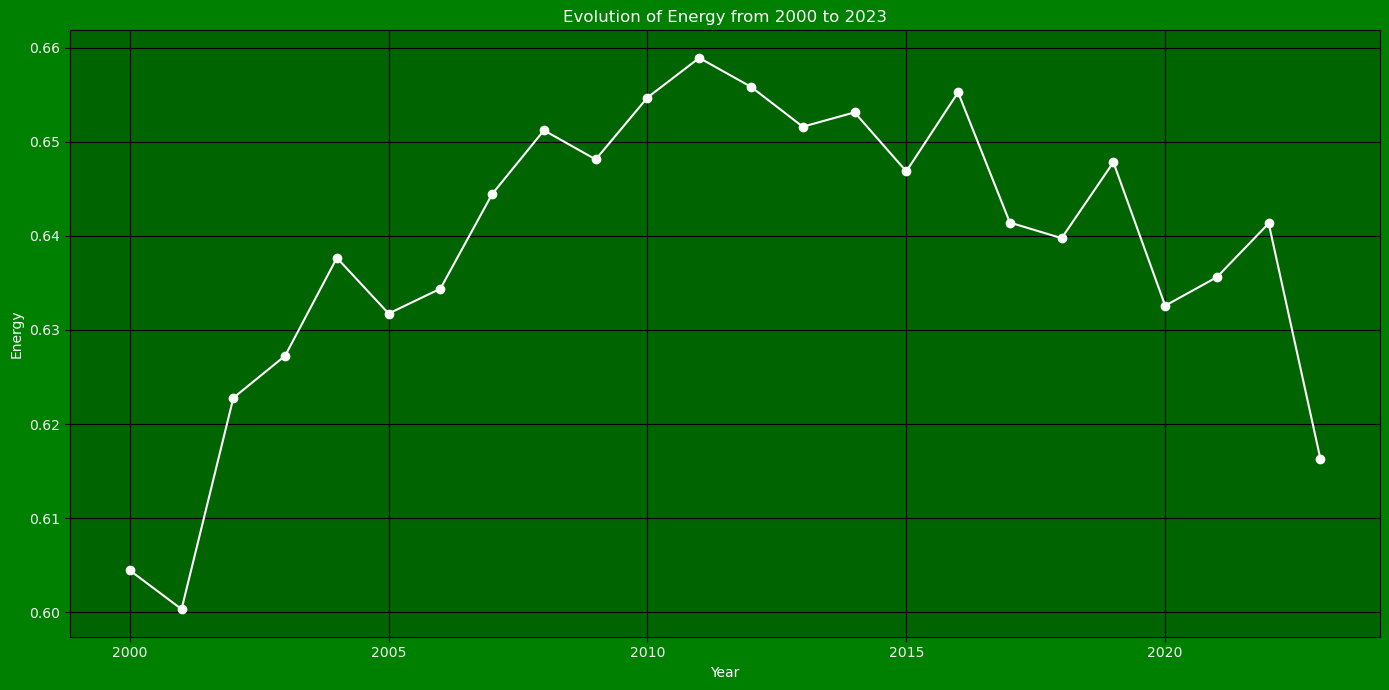

In [13]:
# Create a line plot
plt.figure(figsize=(14, 7))
plt.plot(energy_by_year['year'], energy_by_year['energy'], marker='o', linestyle='-', color='white')

# Add chart title and labels and other visual properties
plt.title('Evolution of Energy from 2000 to 2023', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Energy', color='white')
plt.xticks(color='whitesmoke')
plt.yticks(color='whitesmoke')
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('green')
plt.grid(True, color='black')
plt.tight_layout()

# Show the plot
plt.show()

- Song Duration Changes from 2000 to 2023
  
---

In [14]:
# Group by year and calculate the average duration in minutes
avg_duration_by_year = spotify_2000_2023.groupby('year')['duration_ms'].mean().reset_index()

# Convert duration from milliseconds to minutes
avg_duration_by_year['duration_min'] = avg_duration_by_year['duration_ms'] / (1000 * 60)

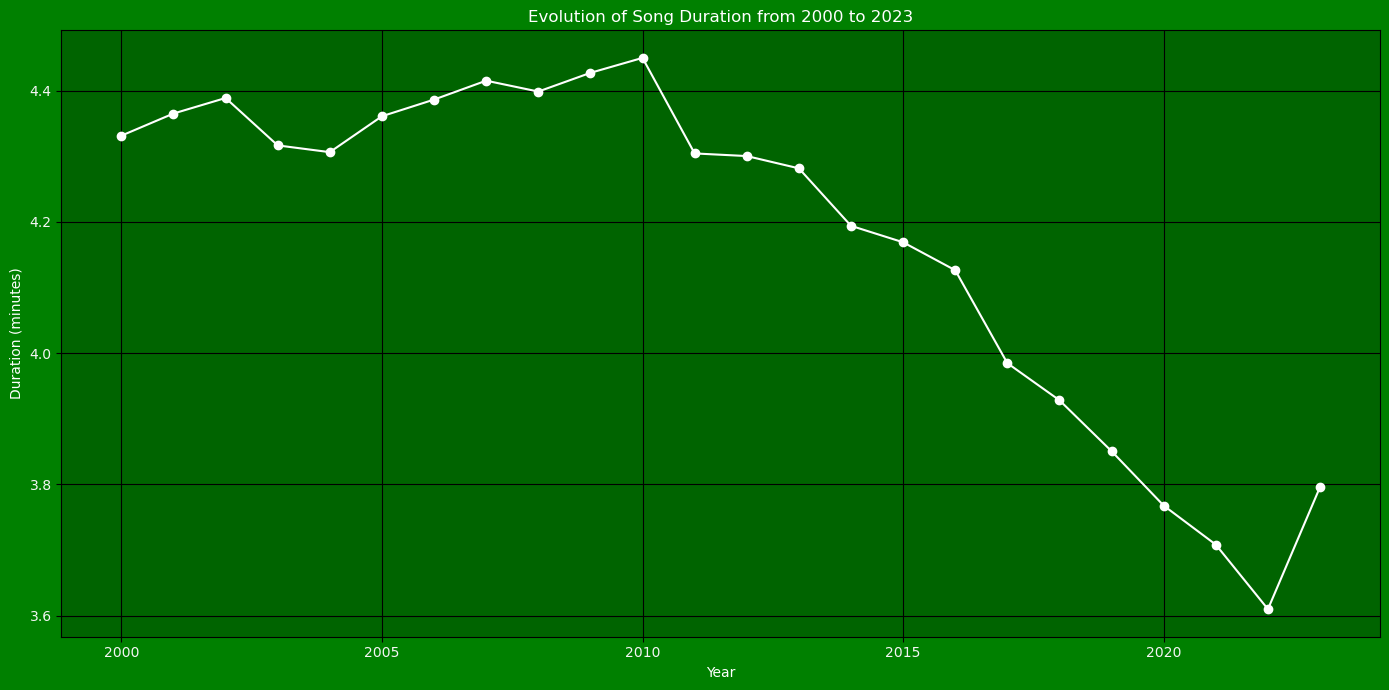

In [15]:
# Create a line plot
plt.figure(figsize=(14, 7))
plt.plot(avg_duration_by_year['year'], avg_duration_by_year['duration_min'], marker='o', linestyle='-', color='white')

# Add chart title and labels and other visual properties
plt.title('Evolution of Song Duration from 2000 to 2023', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Duration (minutes)', color='white')
plt.xticks(color='whitesmoke')
plt.yticks(color='whitesmoke')
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('green')
plt.grid(True, color='black')
plt.tight_layout()

# Show the plot
plt.show()

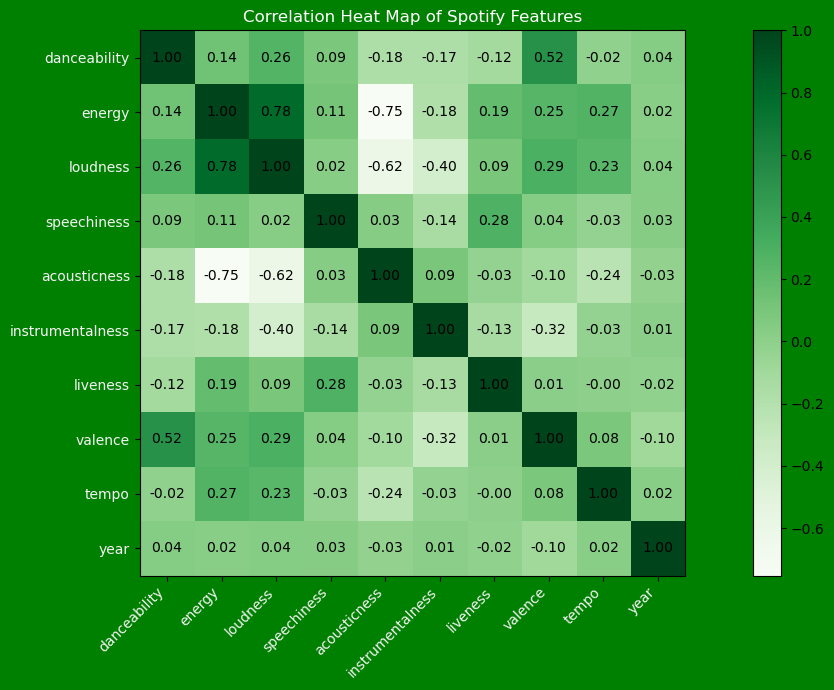

In [16]:
# Select numerical columns for the heat map
numerical_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'year']

# Calculate the correlation matrix
correlation_matrix = spotify_data_df[numerical_columns].corr()

# Create a heatmap using Matplotlib
plt.figure(figsize=(14, 7))
heatmap = plt.imshow(correlation_matrix, cmap='Greens', interpolation='nearest')
plt.colorbar(heatmap)

# Add chart title and labels and other visual properties
plt.xticks(np.arange(len(numerical_columns)), numerical_columns, rotation=45, ha="right")
plt.yticks(np.arange(len(numerical_columns)), numerical_columns, fontsize=10)
plt.title('Correlation Heat Map of Spotify Features', color='white')
plt.xticks(color='whitesmoke')
plt.yticks(color='whitesmoke')
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('green')
plt.tight_layout()

# Add correlation values inside the heatmap cells
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Show the plot
plt.show()